In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df2=pd.read_csv("../data/raw/data_test.csv")

## **FEATURE ENGINEERING**

In [6]:
df2.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,28,Female,55.1,1.79,192,159,67,1.99,1582.0,Yoga,17.0,2.7,5,3,17.20
1,47,Male,127.1,1.76,199,157,73,0.71,552.0,Strength,24.9,3.0,2,1,41.03
2,48,Female,69.1,1.60,191,166,53,1.34,1001.0,Strength,26.1,2.0,4,2,26.99
3,41,Female,66.8,1.74,164,149,57,1.34,898.0,Yoga,29.2,2.3,3,1,22.06
4,26,Male,125.5,1.76,176,163,66,1.15,1031.0,Yoga,23.2,3.1,4,2,40.52


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            124 non-null    int64  
 1   Gender                         124 non-null    object 
 2   Weight (kg)                    124 non-null    float64
 3   Height (m)                     124 non-null    float64
 4   Max_BPM                        124 non-null    int64  
 5   Avg_BPM                        124 non-null    int64  
 6   Resting_BPM                    124 non-null    int64  
 7   Session_Duration (hours)       124 non-null    float64
 8   Calories_Burned                124 non-null    float64
 9   Workout_Type                   124 non-null    object 
 10  Fat_Percentage                 124 non-null    float64
 11  Water_Intake (liters)          124 non-null    float64
 12  Workout_Frequency (days/week)  124 non-null    int

Transformamos las variables object en numéricas

In [8]:
df2["Male"] = df2["Gender"].map({"Male": 1, "Female": 0})
df2=df2.drop(columns="Gender")


In [9]:
df2.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Male
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,37.524194,74.520968,1.705484,180.846774,143.822581,62.427419,1.255968,904.241935,24.195968,2.629839,3.370968,1.903226,25.693790,0.500000
std,12.927228,21.868232,0.120476,11.632618,14.462763,7.412551,0.373933,283.733368,6.341865,0.586983,0.932413,0.769535,7.326565,0.502028
min,18.000000,40.500000,1.500000,160.000000,120.000000,50.000000,0.570000,354.000000,10.000000,1.500000,2.000000,1.000000,12.970000,0.000000
25%,26.000000,58.200000,1.620000,170.750000,132.000000,56.000000,1.020000,709.750000,20.100000,2.200000,3.000000,1.000000,21.790000,0.000000
50%,36.500000,70.000000,1.680000,182.000000,141.500000,63.000000,1.205000,883.000000,25.200000,2.700000,3.000000,2.000000,24.295000,0.500000
75%,50.000000,86.450000,1.770000,191.250000,157.000000,68.000000,1.515000,1075.000000,28.275000,3.025000,4.000000,2.250000,28.560000,1.000000
max,59.000000,129.200000,2.000000,199.000000,168.000000,74.000000,1.990000,1783.000000,34.900000,3.700000,5.000000,3.000000,49.840000,1.000000


Habrá que escalar las variables ya que tenemos una distribución de los datos muy variada entre las variables

## **ANÁLISIS** 

In [10]:
# sns.pairplot(df2,height=4,
#             vars=df2.columns);

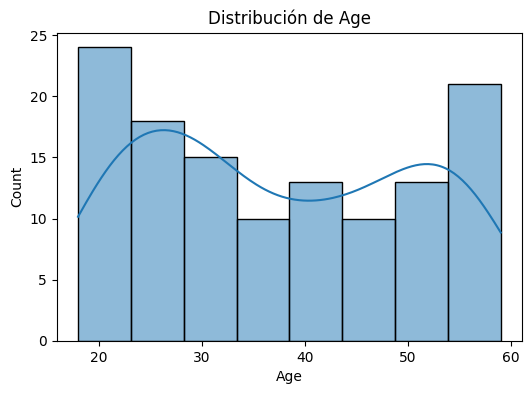

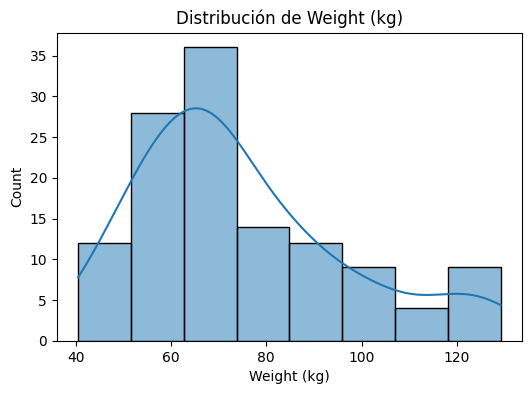

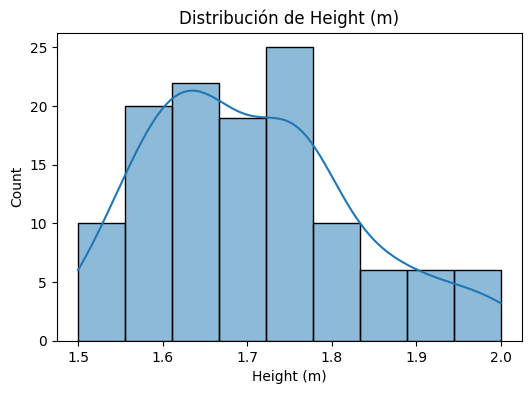

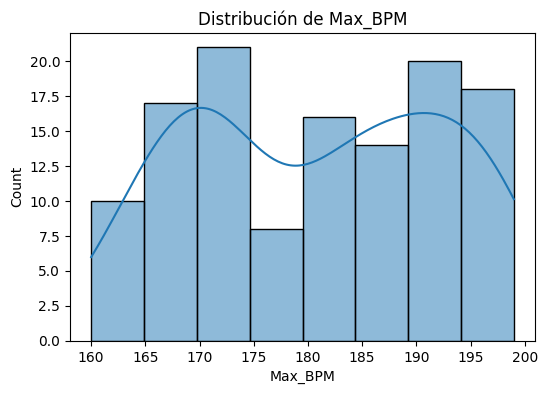

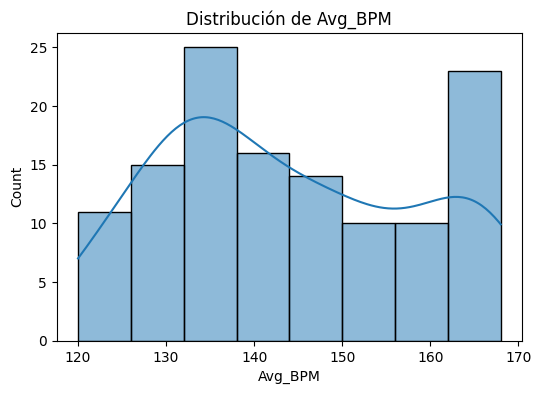

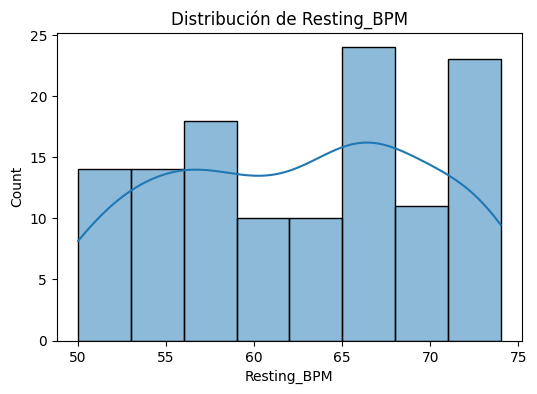

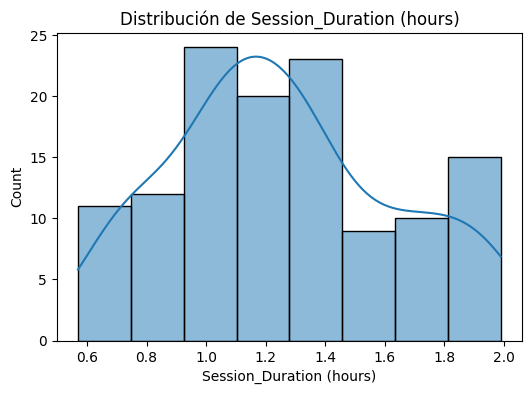

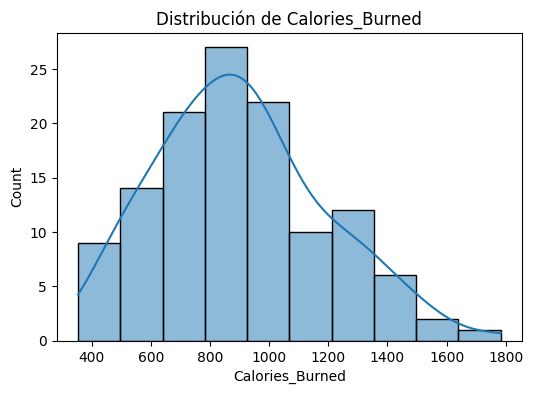

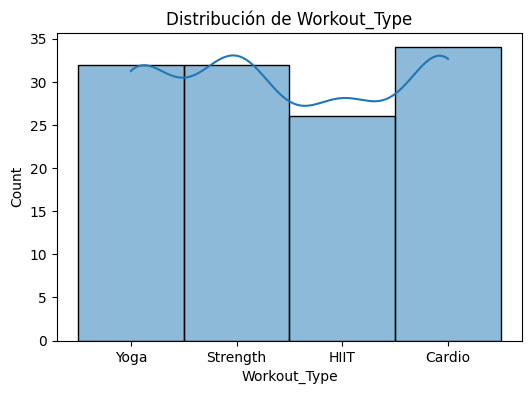

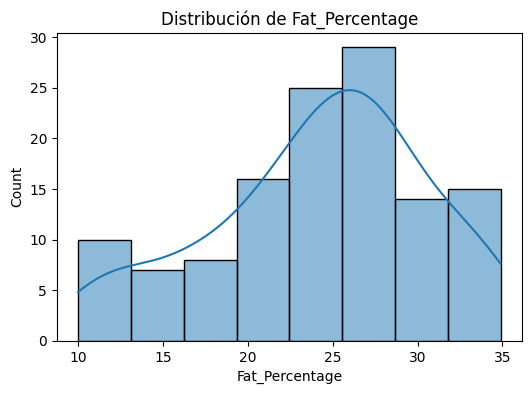

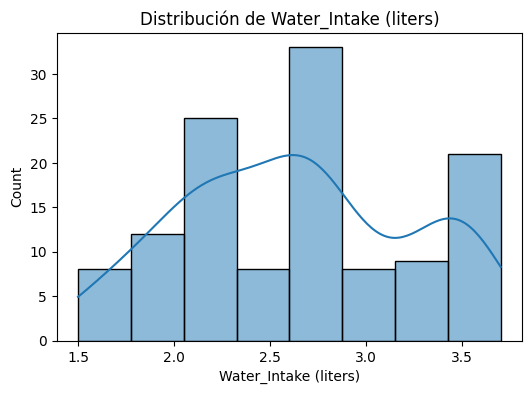

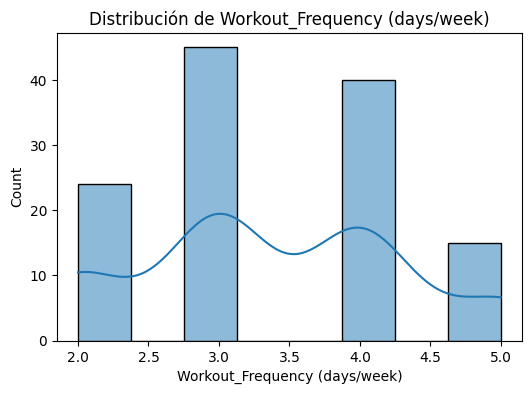

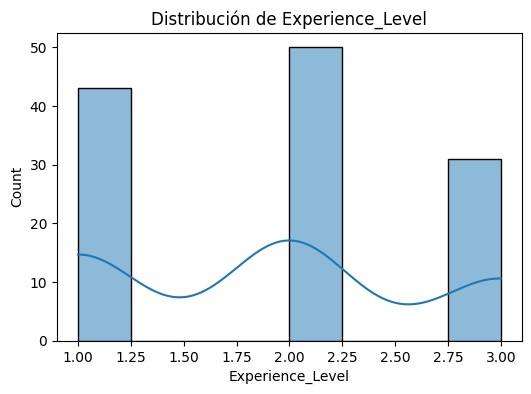

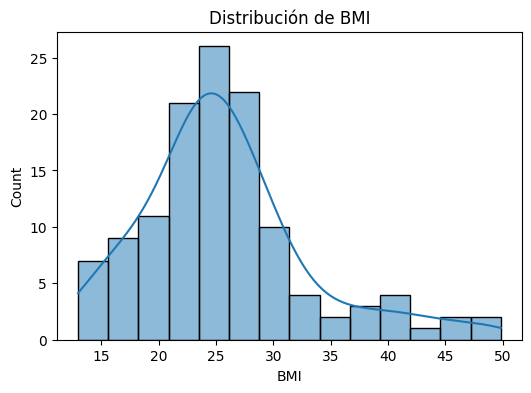

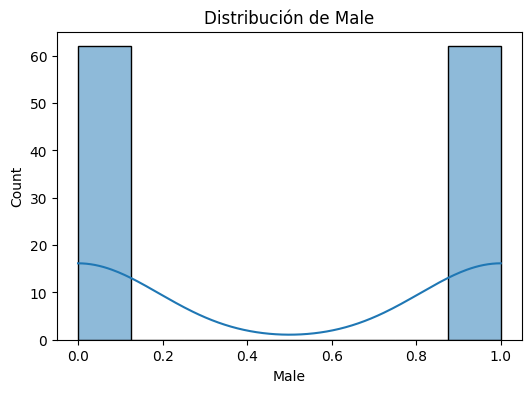

In [11]:
for col in df2.columns:
    plt.figure(figsize=(6, 4)) 
    sns.histplot(df2[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

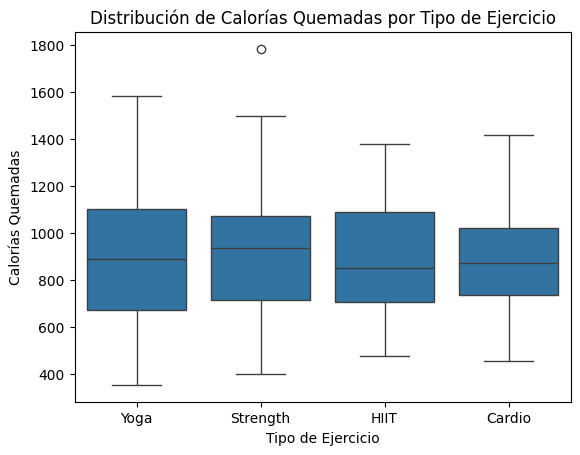

In [12]:
sns.boxplot(data=df2, x='Workout_Type', y='Calories_Burned')

# Añadir título y etiquetas
plt.title('Distribución de Calorías Quemadas por Tipo de Ejercicio')
plt.xlabel('Tipo de Ejercicio')
plt.ylabel('Calorías Quemadas')

# Mostrar el gráfico
plt.show()


In [13]:
out_l=df2[(df2["Calories_Burned"] > 800) & (df2["Calories_Burned"] < 1200)]


In [14]:
out_l["Experience_Level"].value_counts()

Experience_Level
2    34
1    12
3    11
Name: count, dtype: int64

In [15]:
out_l["Session_Duration (hours)"].value_counts()

Session_Duration (hours)
1.32    4
1.34    3
1.38    3
1.15    3
1.28    2
1.18    2
1.30    2
1.77    2
1.39    2
1.20    2
1.31    2
1.24    2
1.70    1
1.35    1
1.07    1
1.06    1
1.33    1
1.58    1
1.29    1
1.22    1
1.88    1
1.49    1
1.85    1
1.50    1
1.19    1
1.42    1
1.46    1
1.09    1
1.56    1
1.13    1
1.66    1
1.26    1
1.14    1
1.91    1
1.21    1
1.83    1
1.17    1
1.12    1
1.72    1
1.10    1
Name: count, dtype: int64

In [16]:
out_l2=df2[df2["Calories_Burned"]>1600]

In [17]:
out_l2["Experience_Level"].value_counts()

Experience_Level
3    1
Name: count, dtype: int64

In [18]:
out_l2["Session_Duration (hours)"].value_counts()

Session_Duration (hours)
1.93    1
Name: count, dtype: int64

Podemos suponer que esos outlier pueden deberse al nivel de la persona en cada ejercicio y a la duración. Cuanto mayor es el nivel y maás tiempo se dedique a la actividad física, más kcal se quemarán. Además vemos un salto en la duranción de las sesiones que pueden dar lugar a esos valores fuera de rango

In [19]:
df2 = pd.get_dummies(df2, columns=['Workout_Type'])
df2=df2.replace({True:1,False:0})

C:\Users\UX490U\AppData\Local\Temp\ipykernel_14584\3997012862.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2=df2.replace({True:1,False:0})


<Axes: >

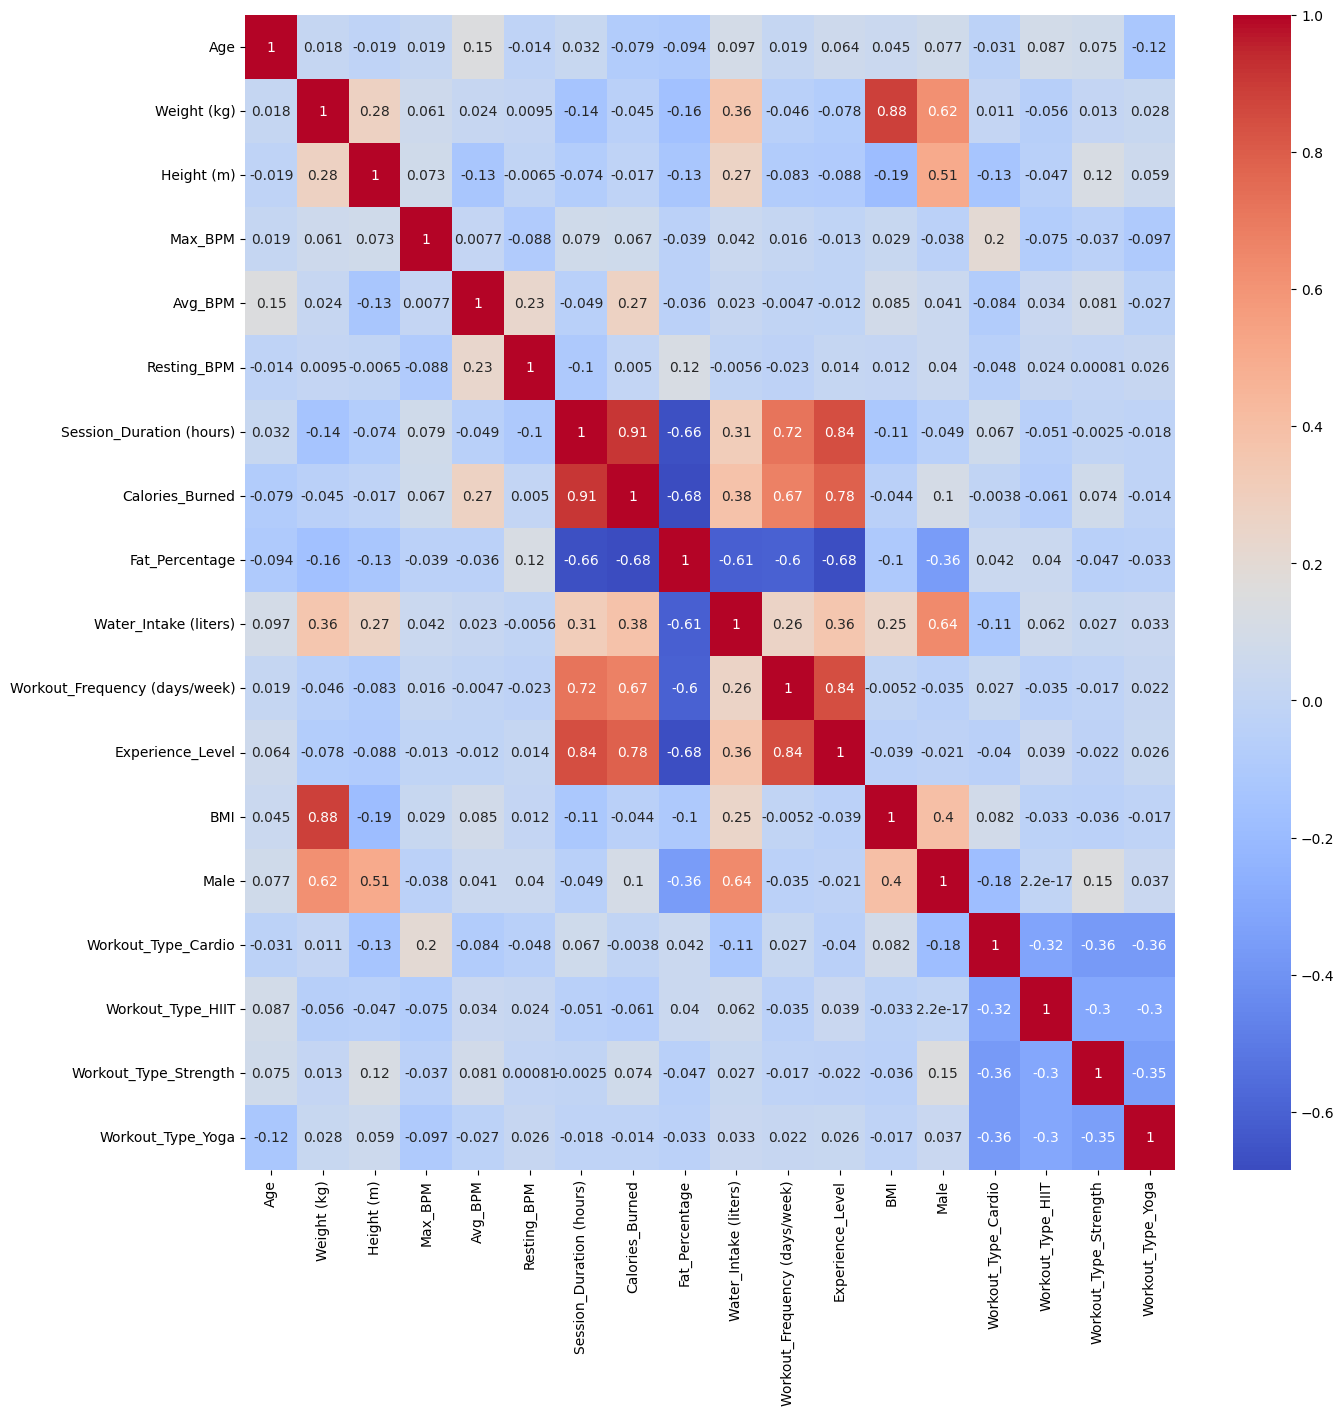

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm")

<Axes: >

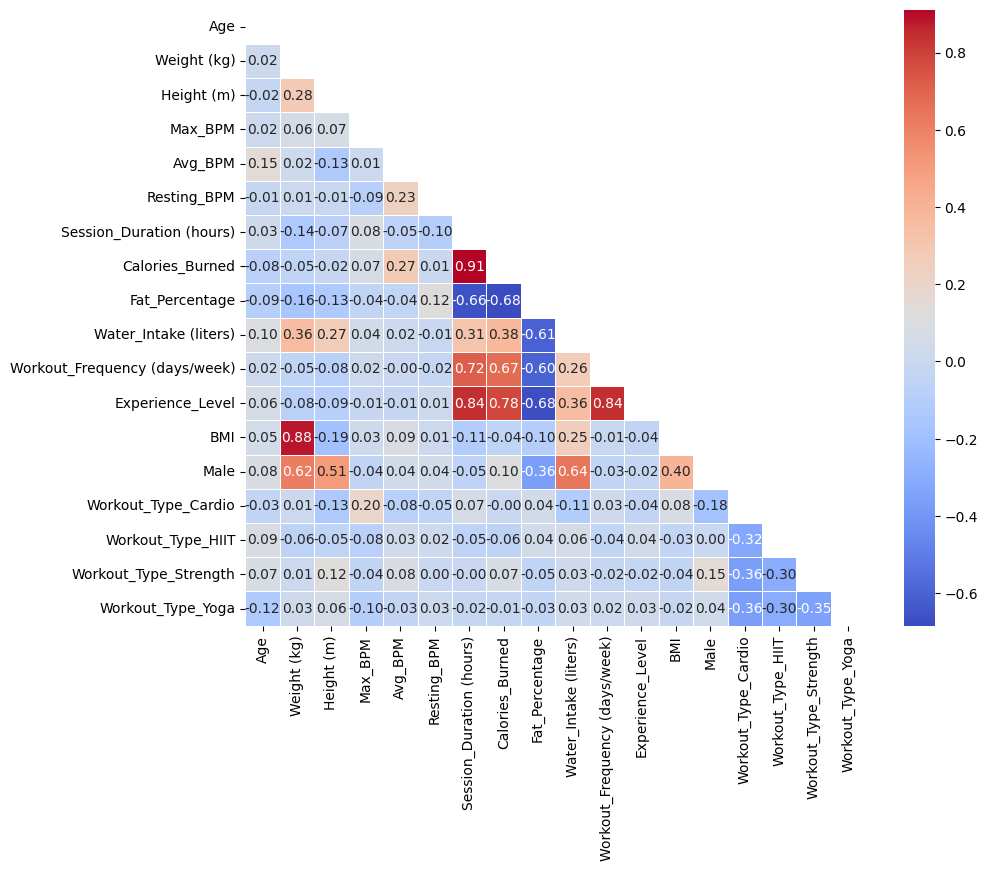

In [21]:
mask = np.triu(np.ones_like(df2.corr()))

# Configurar el gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), mask=mask, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

In [22]:
df2.to_csv("../data/df_train_kcal.csv",index=False)

In [23]:
df_kcal=pd.read_csv("../data/data_test.csv")

In [24]:
df_kcal.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,28,Female,55.1,1.79,192,159,67,1.99,1582.0,Yoga,17.0,2.7,5,3,17.20
1,47,Male,127.1,1.76,199,157,73,0.71,552.0,Strength,24.9,3.0,2,1,41.03
2,48,Female,69.1,1.60,191,166,53,1.34,1001.0,Strength,26.1,2.0,4,2,26.99
3,41,Female,66.8,1.74,164,149,57,1.34,898.0,Yoga,29.2,2.3,3,1,22.06
4,26,Male,125.5,1.76,176,163,66,1.15,1031.0,Yoga,23.2,3.1,4,2,40.52


In [25]:
df_kcal["Male"] = df_kcal["Gender"].map({"Male": 1, "Female": 0})
df_kcal=df_kcal.drop(columns="Gender")

df_kcal = pd.get_dummies(df_kcal, columns=['Workout_Type'])
df_kcal=df_kcal.replace({True:1,False:0})

C:\Users\UX490U\AppData\Local\Temp\ipykernel_14584\3168500457.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kcal=df_kcal.replace({True:1,False:0})


In [26]:
df_kcal.to_csv("../data/df_test_kcal.csv",index=False)